### #3 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### #4 and #5

In [2]:
gdp_df=pd.read_csv("C:/Users/Andrew/Documents/NSS/python/projects/un-project-Main-Im/data/gdp_percapita.csv")
gdp_df
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


There are 8219 rows and 4 columns. Country or Area column type is object. Year column is int64. Value is float64. Value Footnotes is float64.

### #6

In [3]:
gdp_df=gdp_df.drop(columns='Value Footnotes')
gdp_df=gdp_df.rename(columns={'Country or Area':'Country','Year':'Year','Value':'GDP_per_Capita'})
gdp_df

,Country,Year,GDP_per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


### #7

In [4]:
gdp_df.Year.nunique()

34

In [5]:
new_list=gdp_df.Country.value_counts()
new_list
countries_count=new_list.to_frame()
countries_count
full_countries_list=countries_count.loc[countries_count['count']==34]
full_countries_list

,count
Country,
Africa Eastern and Southern,34
Africa Western and Central,34
Albania,34
Andorra,34
Algeria,34
...,...
Turkmenistan,34
Timor-Leste,34
Togo,34


In [6]:
missing_countries_list=countries_count.loc[countries_count['count']<34]
missing_countries_list

,count
Country,
Lebanon,33
Tonga,33
Bhutan,33
Syrian Arab Republic,33
Somalia,33
Greenland,32
West Bank and Gaza,30
Serbia,29
Montenegro,27


In [7]:
new_list2=gdp_df.Year.value_counts()
new_list2

Year
2020    247
2021    247
2013    247
2016    247
2019    247
2018    247
2017    247
2014    247
2015    247
2022    246
2011    246
2012    246
2009    245
2010    245
2008    244
2007    242
2006    242
2005    241
2003    241
2004    241
2002    241
2023    240
2001    240
2000    240
1999    238
1998    238
1997    238
1996    236
1995    236
1994    235
1993    234
1992    234
1991    234
1990    233
Name: count, dtype: int64

### #8 Most of the data is below 20,000 GDP and the graphs are right skewed

<Axes: >

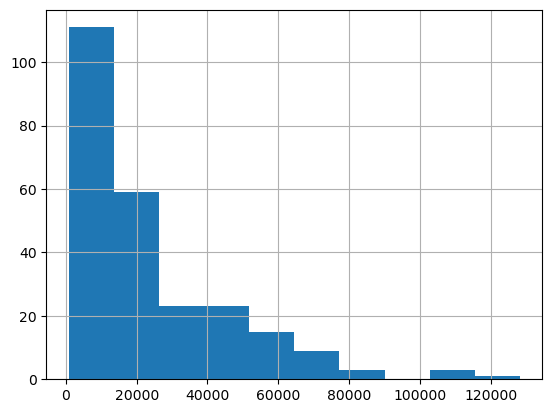

In [8]:
gdp_2020=gdp_df[gdp_df['Year']==2020]
gdp_2020.GDP_per_Capita.hist()

<Axes: xlabel='GDP_per_Capita', ylabel='Density'>

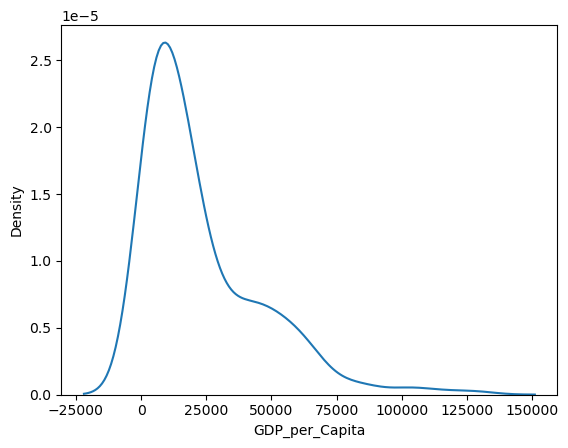

In [9]:
sns.kdeplot(gdp_2020.GDP_per_Capita)

<Axes: xlabel='GDP_per_Capita'>

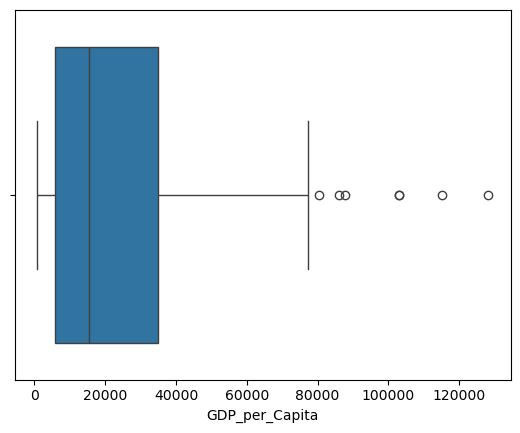

In [10]:
sns.boxplot(data=gdp_2020.GDP_per_Capita,orient='h')

<Axes: ylabel='GDP_per_Capita'>

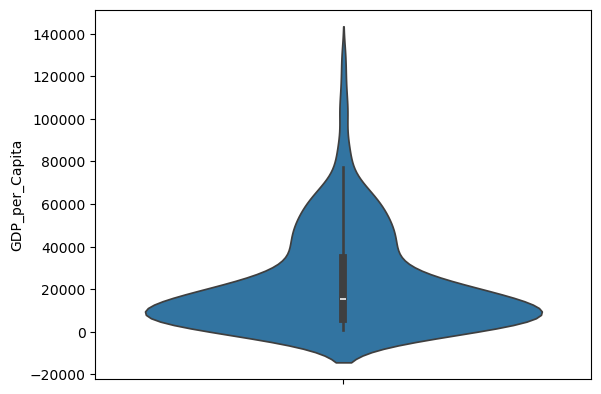

In [11]:
sns.violinplot(data=gdp_2020.GDP_per_Capita)

### #9

In [12]:
gdp_2020.GDP_per_Capita.median()

15309.23598817024

### #10

In [13]:
gdp_decades=gdp_df[gdp_df['Year'].isin([1990,2000,2010,2020])]
gdp_decades

,Country,Year,GDP_per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012
...,...,...,...
8184,Zambia,1990,2425.111287
8188,Zimbabwe,2020,2987.269823
8198,Zimbabwe,2010,2572.769992
8208,Zimbabwe,2000,4071.022001


<Axes: xlabel='Year', ylabel='GDP_per_Capita'>

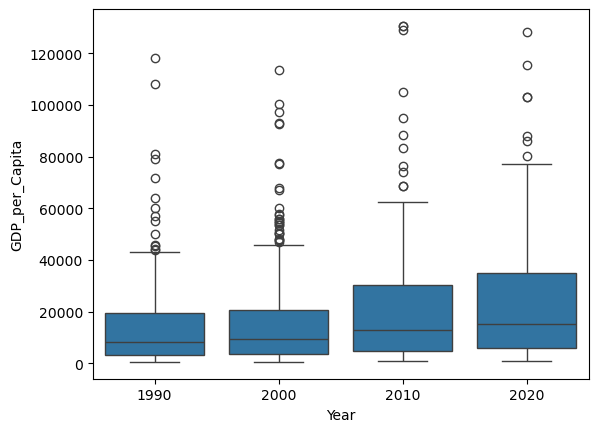

In [14]:
sns.boxplot(x=gdp_decades.Year,y=gdp_decades.GDP_per_Capita)

<Axes: xlabel='Year', ylabel='GDP_per_Capita'>

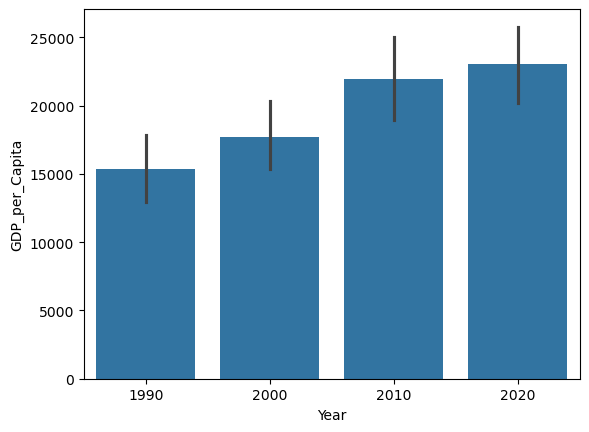

In [15]:
sns.barplot(x=gdp_decades.Year,y=gdp_decades.GDP_per_Capita)

<Axes: xlabel='Year', ylabel='GDP_per_Capita'>

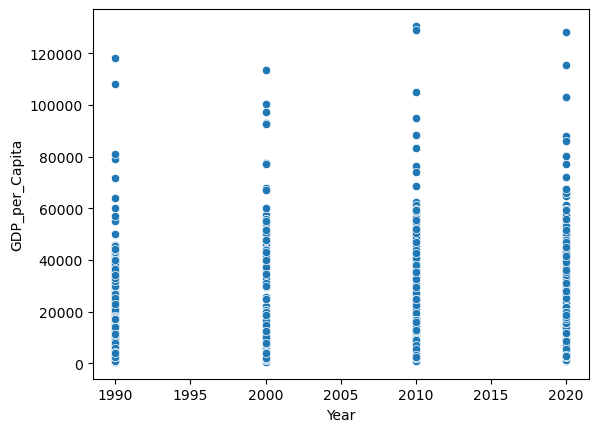

In [16]:
sns.scatterplot(x=gdp_decades.Year,y=gdp_decades.GDP_per_Capita)

<Axes: xlabel='Year', ylabel='GDP_per_Capita'>

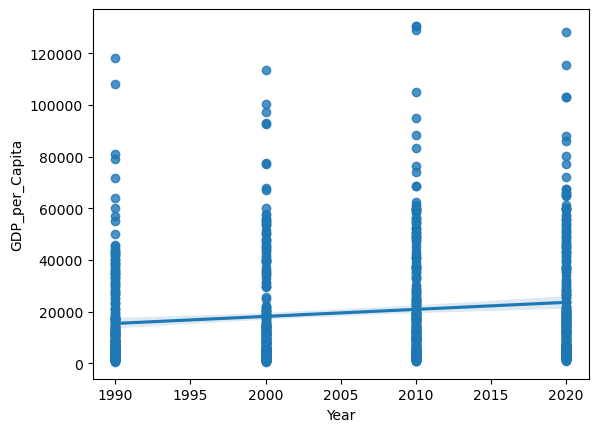

In [17]:
sns.regplot(x=gdp_decades.Year,y=gdp_decades.GDP_per_Capita)

### #11

In [18]:
numba_11=gdp_df.loc[gdp_df['GDP_per_Capita']>100000]
numba_11.loc[numba_11['Year']==numba_11.Year.min()]


,Country,Year,GDP_per_Capita
974,Brunei,1990,118163.683198
7827,United Arab Emirates,1990,108057.042464


### #12

In [19]:
gdp_2020.loc[gdp_2020.GDP_per_Capita==gdp_2020.GDP_per_Capita.max()]

,Country,Year,GDP_per_Capita
4426,Luxembourg,2020,128256.560341


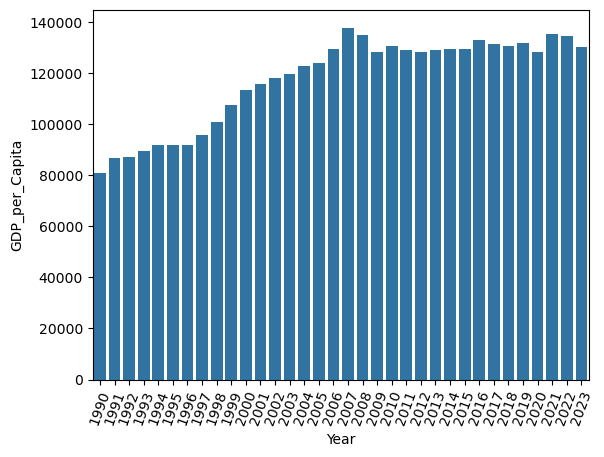

In [35]:
sns.barplot(data= gdp_df[gdp_df['Country']== 'Luxembourg'],x= 'Year',y= 'GDP_per_Capita')
plt.xticks(rotation=70);

### #13 (?)

In [36]:
gdp_2020.loc[gdp_2020.GDP_per_Capita==gdp_2020.GDP_per_Capita.min()]

,Country,Year,GDP_per_Capita
1046,Burundi,2020,833.920257


<Axes: xlabel='Year', ylabel='GDP_per_Capita'>

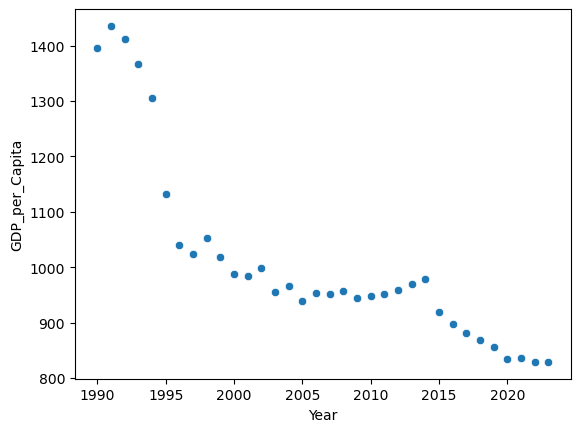

In [38]:
sns.scatterplot(data=gdp_df[gdp_df['Country']=='Burundi'],x='Year',y='GDP_per_Capita')

In [50]:
gdp_1990=gdp_df[gdp_df.Year==1990]

In [51]:
gdp_1990.reset_index(drop=True)

,Country,Year,GDP_per_Capita
0,Africa Eastern and Southern,1990,3386.854480
1,Africa Western and Central,1990,3299.401375
2,Albania,1990,5327.747458
3,Algeria,1990,11728.545729
4,Andorra,1990,50036.300776
...,...,...,...
228,Vanuatu,1990,3101.680551
229,Viet Nam,1990,2467.964601
230,World,1990,11207.386344
231,Zambia,1990,2425.111287


In [52]:
gdp_2020.reset_index(drop=True)

,Country,Year,GDP_per_Capita
0,Afghanistan,2020,2769.685745
1,Africa Eastern and Southern,2020,3861.111238
2,Africa Western and Central,2020,4622.731427
3,Albania,2020,14650.395929
4,Algeria,2020,14194.155748
...,...,...,...
242,Virgin Islands,2020,45055.782930
243,West Bank and Gaza,2020,5423.682547
244,World,2020,18600.986362
245,Zambia,2020,3391.595412


### #14

In [58]:
internet_df=pd.read_csv("C:/Users/Andrew/Documents/NSS/python/projects/un-project-Main-Im/data/internet_use.csv",on_bad_lines='skip')
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4
...,...,...,...,...
6375,293,Estimated based on Survey's results. Populatio...,NaN,NaN
6376,294,Preliminary. Country estimate.,NaN,NaN
6377,295,18+. ITU estimate.,NaN,NaN
6378,296,ICT survey. Population age 11+,NaN,NaN
